Dittenber, Benjamin: Grade=75/100
1.) No caption for figure in Exercise 3
2.) Questions not answered for Exercise 5!

Exercise #1

In [2]:
import numpy as np
arr1 = np.array([[1, 2, 3, 4], [1, 4, 3, 4], [1, 4, 0, 5], [1, 5, 2, 1]])
arr2 = np.array([[1, 2, 1, 2], [1, 1, 2, 2], [1, 0, 1, 0], [1, 1, 0, 1]])
print arr1
print arr2
np.dot(arr1, arr2, out=None)

[[1 2 3 4]
 [1 4 3 4]
 [1 4 0 5]
 [1 5 2 1]]
[[1 2 1 2]
 [1 1 2 2]
 [1 0 1 0]
 [1 1 0 1]]


array([[10,  8,  8, 10],
       [12, 10, 12, 14],
       [10, 11,  9, 15],
       [ 9,  8, 13, 13]])

Exersise #2

In [3]:
import math
def fn(x, y):
    f = 1.0
    for k in range(1, y):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f
y = 1
pi = 3.141592653
while fn(pi, y + 1) != fn(pi, y):
    y += 1
print y
    

15


Exersise #3

Filename: andromeda_rot.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      53   (510, 340)   int16 (rescales to uint16)   


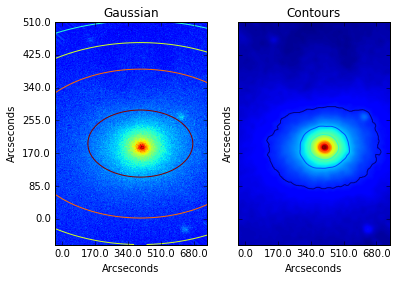

In [11]:
% matplotlib inline
from astropy.io import fits
from scipy import ndimage
from scipy import optimize
sys.path.append(root)
image = fits.info('andromeda_rot.fits')
image
data = fits.getdata('andromeda_rot.fits')
f, ((ax1), (ax2)) = plt.subplots(1, 2, sharex = 'col', sharey = 'row')
blurred_data = ndimage.gaussian_filter(data,sigma=3)

def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p
ax1.imshow(data)
params = fitgaussian(data)
fit = gaussian(*params)
ax1.contour(fit(*np.indices(data.shape)))
(height, x, y, width_x, width_y) = params


ax2.imshow(blurred_data)
ax2.contour(blurred_data)
ax2.set_title('Contours')
ax2.set_xlabel('Arcseconds')
ax2.set_ylabel('Arcseconds')

ylabels=ax2.get_yticks().tolist()
ylabels.reverse()
ylabels = [1.7*x for x in ylabels]
ax2.set_yticklabels(ylabels)

xlabels=ax2.get_xticks().tolist()
xlabels = [1.7*x for x in xlabels]
ax2.set_xticklabels(xlabels)

#set labels and title for first plot
ax1.set_title('Gaussian')
ax1.set_xlabel('Arcseconds')
ax1.set_ylabel('Arcseconds')

ylabels=ax1.get_yticks().tolist()
ylabels = [1.7*x for x in ylabels]
ylabels.reverse()
ax1.set_yticklabels(ylabels)

xlabels=ax1.get_xticks().tolist()
xlabels = [1.7*x for x in xlabels]
ax1.set_xticklabels(xlabels)